# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# set monthly_income variable to 12000
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
# The line below makes an API request and displays the response data in JSON format for the new variable btc_response
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# The line below reformats the raw JSON data into a readable format
print(json.dumps(btc_response, indent = 5, sort_keys =  True))

{
     "data": {
          "1": {
               "circulating_supply": 18747112,
               "id": 1,
               "last_updated": 1625341446,
               "max_supply": 21000000,
               "name": "Bitcoin",
               "quotes": {
                    "USD": {
                         "market_cap": 651114415129,
                         "percent_change_1h": 0.13381550172493,
                         "percent_change_24h": 4.20951987693754,
                         "percent_change_7d": 8.78025281834397,
                         "percentage_change_1h": 0.13381550172493,
                         "percentage_change_24h": 4.20951987693754,
                         "percentage_change_7d": 8.78025281834397,
                         "price": 34748.0,
                         "volume_24h": 22732924174
                    }
               },
               "rank": 1,
               "symbol": "BTC",
               "total_supply": 18747112,
               "website_slug": "bitcoin"
 

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
# The line below makes an API request and displays the response data in JSON format for the new variable eth_response
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# The line below reformats the raw JSON data into a readable format
print(json.dumps(eth_response, indent = 5, sort_keys = True))

{
     "data": {
          "1027": {
               "circulating_supply": 116545824,
               "id": 1027,
               "last_updated": 1625341446,
               "max_supply": 0,
               "name": "Ethereum",
               "quotes": {
                    "USD": {
                         "market_cap": 259428753052,
                         "percent_change_1h": 0.288850170035493,
                         "percent_change_24h": 5.90278325873523,
                         "percent_change_7d": 21.3762836505722,
                         "percentage_change_1h": 0.288850170035493,
                         "percentage_change_24h": 5.90278325873523,
                         "percentage_change_7d": 21.3762836505722,
                         "price": 2225.39,
                         "volume_24h": 20106826433
                    }
               },
               "rank": 2,
               "symbol": "ETH",
               "total_supply": 116545824,
               "website_slug": "ethere

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
# The line below sets the btc_price variable to the USD price by accessing the price from the btc_reponse data
btc_price = btc_response ["data"]["1"]["quotes"]["USD"]["price"]

    
# Print the current price of BTC
# Below uses print and f" to create a string and pass in the variable btc_price
print(f" The current price of BTC is ${btc_price:.2f}")

 The current price of BTC is $34748.00


In [9]:
# Navigate the BTC response object to access the current price of ETH
# The line below sets the eth_price variable to the USD price by accessing the price from the eth_reponse data
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# Below uses print and f" to create a string and pass in the variable eth_price
print(f" The current ETH price is ${eth_price:.2f}")

 The current ETH price is $2225.39


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
# below multiply the number of coins by the current value using the variables created previously
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# Below uses print and f" to create a string and pass in the variable btc_value to display current value held in the cryptocurrency wallet
print(f" The current value of BTC in the cryptocurrency wallet is ${btc_value:.2}")

 The current value of BTC in the cryptocurrency wallet is $4.2e+04


In [11]:
# Compute the current value of the ETH holding 
# below multiply the number of coins by the current value using the variables created previously
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# Below uses print and f" to create a string and pass in the variable eth_value to display current value held in the cryptocurrency wallet
print(f" The current value of ETH in the cryptocurrency wallet is ${eth_value:.2}")

 The current value of ETH in the cryptocurrency wallet is $1.2e+04


In [12]:
# Compute the total value of the cryptocurrency wallet
# The line below creates a new variable that represents the total value of the cryptocurrency wallet by adding the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# Below uses print and f" to create a string and pass in the variable total_crypto_wallet to display current total value held in the cryptocurrency wallet
print(f" The current total value of the cryptocurrency wallet is ${total_crypto_wallet:.2}")

 The current total value of the cryptocurrency wallet is $5.3e+04


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
# Below sets the new variables to the API keys that were stored in the .env file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET_KEY") 
print(alpaca_api_key)
print(alpaca_secret_key)

# Create the Alpaca tradeapi.REST object
# Below sets your keys and version to the Alpaca SDK
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")


PKRQWG6PTQ6RY0TCONWZ
MbEBV79vnryBOX5Wa8Cj4w67jZ1Ptb55MjpJeOXV


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# The list below holds both the bond and stock tickers 
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
# Below sets the variable to 1 day to be used in the Alpaca API
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# Below sets the start day and end date in the iso format(YYYY-MM-DD) in the newyork timezone
start_date = pd.Timestamp("2020-08-07", tz= "America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz= "America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# Below will make an Alpaca API call to retrieve the tickers data (SPY and AGG) and grab the data between the start_date and the end_date that were set in the step 3
df_potfolio_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_potfolio_prices.head()


AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_potfolio_prices["AGG"]["close"][0]

# Print the AGG closing price
print(f" AGG closing prices ${agg_close_price:.2}")


 AGG closing prices $1.2e+02


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_potfolio_prices["SPY"]["close"][0]

# Print the SPY closing price
print(f" SPY closing prices ${spy_close_price:.2}")


 SPY closing prices $3.3e+02


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
# Below creates a new variable to hold the current value of the bond by multiplying the current number of shares by the current bond value
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f" The current value of the bond portfolio is ${agg_value:.2f}")


 The current value of the bond portfolio is $23889.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
# Below creates a new variable to hold the current value of the stocks by multiplying the current number of shares by the current share value
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f" The current value of the stock portfolio is ${spy_value:.2f}")


 The current value of the stock portfolio is $36800.50


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
# The new variable below total_stocks_bonds is the current total value of the stock & bond portfolio by adding the current bond and stock values together
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds}")


The current balance of the stock and bond portion of the portfolio is $60689.5


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
# Below is the total current value of the portfolio including the crypto wallet
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print the total_portfolio
print(f" The current value of the total portfolio is ${total_portfolio:.2f}")


 The current value of the total portfolio is $114181.67


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# Below creates a list holding the total current value of the stock & bonds and the crypto wallet
savings_data = [total_stocks_bonds, total_crypto_wallet]

# Review the Python list savings_data
savings_data
    

[60689.5, 53492.167]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# Below creates a new DataFrame with the list created above and setting the list as the index for the DataFrame and the columns as Current Total Value
df_savings = pd.DataFrame(savings_data, index = ["Stocks and Bonds", "Cryptocurrency"], columns = ["Current Total Value"])

# Display the savings_df DataFrame
df_savings


,Current Total Value
Stocks and Bonds,60689.500
Cryptocurrency,53492.167


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<AxesSubplot:ylabel='Amount'>], dtype=object)

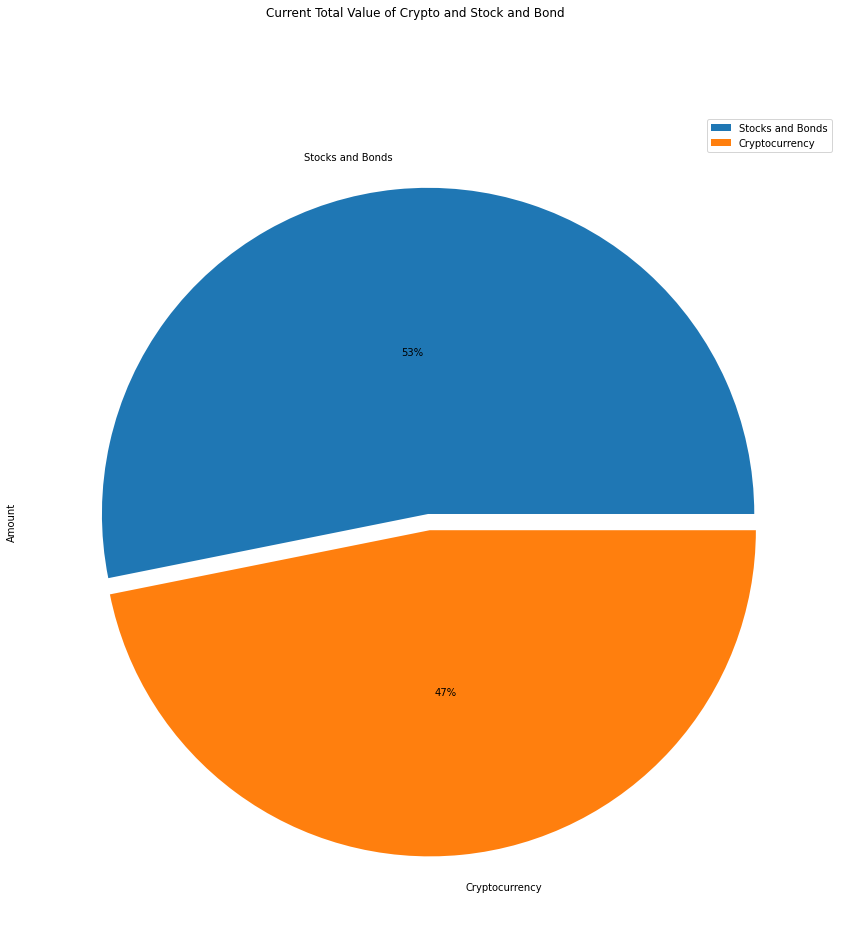

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# The code below creates a pie chart of the total current value of the portfolio

df_savings.plot.pie(title = "Current Total Value of Crypto and Stock and Bond", subplots=True, ylabel='Amount', figsize=(15,15), autopct='%1.0f%%', pctdistance=0.5, explode=(0.025,0.025))

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# Below the emergency fund is set to 3x the current monthly income
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# Below the if elif else statements will determine if the current value of the portfolio has sufficient funds to cover the emergency fund and will generate a print statement indicating the status
if emergency_fund_value >  total_portfolio:
    print("Yes the current portfolio balance has more than enough to cover the emergency portfolio fund")
elif emergency_fund_value == total_portfolio:
        print("Yes the current portfolio balance can cover a potential emergency fund expense")
else:
        print("No the portfolio balance is insufficient to meet the required emergency portfolio fund  ")



No the portfolio balance is insufficient to meet the required emergency portfolio fund  


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 

# The start end dates below will grab the 10 years of data, however due to the size of the request the time periods were required to be broken up into smaller timeframes to pull the data
# each pair of start & ends will need its own DataFrame
start_date = pd.Timestamp("2011-06-30", tz = "America/New_York").isoformat
end_date = pd.Timestamp("2021-06-30", tz = "America/New_York").isoformat




In [29]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

#The code below creates the new DataFrames for every two years, these will need to be joined together in a master DataFrame at the end
 #1
start_date = pd.Timestamp("2011-06-30", tz = "America/New_York").isoformat
end_date = pd.Timestamp("2013-06-30", tz = "America/New_York").isoformat
df_potfolio_prices_10yrs_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

#2
start_date = pd.Timestamp("2013-06-30", tz = "America/New_York").isoformat
end_date = pd.Timestamp("2015-06-30", tz = "America/New_York").isoformat

df_potfolio_prices_10yrs_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df


 #3
start_date = pd.Timestamp("2015-06-30", tz = "America/New_York").isoformat
end_date = pd.Timestamp("2017-06-30", tz = "America/New_York").isoformat
df_potfolio_prices_10yrs_3 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

#4
start_date = pd.Timestamp("2017-06-30", tz = "America/New_York").isoformat
end_date = pd.Timestamp("2019-06-30", tz = "America/New_York").isoformat

df_potfolio_prices_10yrs_4 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df


#5
start_date = pd.Timestamp("2019-06-30", tz = "America/New_York").isoformat
end_date = pd.Timestamp("2121-06-30", tz = "America/New_York").isoformat

df_potfolio_prices_10yrs_5 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df





# Display both the first and last five rows of the DataFrame
df_potfolio_prices_10yrs_total = df_potfolio_prices_10yrs_1 + df_potfolio_prices_10yrs_2 + df_potfolio_prices_10yrs_3 + df_potfolio_prices_10yrs_4 + df_potfolio_prices_10yrs_5

display(df_potfolio_prices_10yrs_total)

AGG                                         \
                             open     high      low    close      volume   
time                                                                       
2017-07-13 00:00:00-04:00  546.45  546.559  545.650  546.200   7163300.0   
2017-07-14 00:00:00-04:00  547.70  547.800  546.450  546.800   8723850.0   
2017-07-17 00:00:00-04:00  547.00  547.400  546.600  547.050   9552720.0   
2017-07-18 00:00:00-04:00  548.20  548.550  547.900  548.400  12355850.0   
2017-07-19 00:00:00-04:00  548.60  548.750  548.150  548.500   7026445.0   
...                           ...      ...      ...      ...         ...   
2021-06-28 00:00:00-04:00  575.20  576.150  575.200  575.800  27618450.0   
2021-06-29 00:00:00-04:00  575.30  576.250  575.225  576.250  17347025.0   
2021-06-30 00:00:00-04:00  576.80  577.250  576.500  576.750  29921905.0   
2021-07-01 00:00:00-04:00  575.75  575.950  575.050  575.575  22196630.0   
2021-07-02 00:00:00-04:00  576.15  576.850  575.850  576.850  21097470.0   

                               SPY                                           
                              open     high       low    close       volume  
time                                                                         
2017-07-13 00:00:00-04:00      NaN      NaN       NaN      NaN          NaN  
2017-07-14 00:00:00-04:00  1222.10  1229.85  1221.550  1227.70  203790190.0  
2017-07-17 00:00:00-04:00  1227.35  1229.55  1226.650  1227.55  111894855.0  
2017-07-18 00:00:00-04:00  1225.30  1228.60  1223.350  1228.45  158477470.0  
2017-07-19 00:00:00-04:00  1230.10  1235.00  1230.050  1234.95  155038690.0  
...                            ...      ...       ...      ...          ...  
2021-06-28 00:00:00-04:00  2135.85  2138.25  2129.450  2137.40  219686865.0  
2021-06-29 00:00:00-04:00  2139.45  2142.80  2135.650  2138.40  160487860.0  
2021-06-30 00:00:00-04:00  2136.00  2143.90  2135.900  2140.40  233882010.0  
2021-07-01 00:00:00-04:00  2144.15  2153.00  2144.000  2152.35  220739175.0  
2021-07-02 00:00:00-04:00  2158.35  2170.50  2152.609  2168.75  232785350.0  

[1001 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# The Monte Carlo simulation below is using the 10 year data from above with a weighted portfolio of 40% bonds and 60% stocks to generate 500 simulations of the future value of the portfolio in 30 years
mc_30yrs_500sims_weight_40_60 = MCSimulation(
portfolio_data = df_potfolio_prices_10yrs_total,
weights = [.40, .60],
num_simulation = 500,
num_trading_days = 252*30)

# Review the simulation input data
# Below displays the 30 year forecast data with daily returns
mc_30yrs_500sims_weight_40_60.portfolio_data


AGG                                         \
                             open     high      low    close      volume   
time                                                                       
2017-07-13 00:00:00-04:00  546.45  546.559  545.650  546.200   7163300.0   
2017-07-14 00:00:00-04:00  547.70  547.800  546.450  546.800   8723850.0   
2017-07-17 00:00:00-04:00  547.00  547.400  546.600  547.050   9552720.0   
2017-07-18 00:00:00-04:00  548.20  548.550  547.900  548.400  12355850.0   
2017-07-19 00:00:00-04:00  548.60  548.750  548.150  548.500   7026445.0   
...                           ...      ...      ...      ...         ...   
2021-06-28 00:00:00-04:00  575.20  576.150  575.200  575.800  27618450.0   
2021-06-29 00:00:00-04:00  575.30  576.250  575.225  576.250  17347025.0   
2021-06-30 00:00:00-04:00  576.80  577.250  576.500  576.750  29921905.0   
2021-07-01 00:00:00-04:00  575.75  575.950  575.050  575.575  22196630.0   
2021-07-02 00:00:00-04:00  576.15  576.850  575.850  576.850  21097470.0   

                                            SPY                              \
                          daily_return     open     high       low    close   
time                                                                          
2017-07-13 00:00:00-04:00          NaN      NaN      NaN       NaN      NaN   
2017-07-14 00:00:00-04:00     0.001098  1222.10  1229.85  1221.550  1227.70   
2017-07-17 00:00:00-04:00     0.000457  1227.35  1229.55  1226.650  1227.55   
2017-07-18 00:00:00-04:00     0.002468  1225.30  1228.60  1223.350  1228.45   
2017-07-19 00:00:00-04:00     0.000182  1230.10  1235.00  1230.050  1234.95   
...                                ...      ...      ...       ...      ...   
2021-06-28 00:00:00-04:00     0.002350  2135.85  2138.25  2129.450  2137.40   
2021-06-29 00:00:00-04:00     0.000782  2139.45  2142.80  2135.650  2138.40   
2021-06-30 00:00:00-04:00     0.000868  2136.00  2143.90  2135.900  2140.40   
2021-07-01 00:00:00-04:00    -0.002037  2144.15  2153.00  2144.000  2152.35   
2021-07-02 00:00:00-04:00     0.002215  2158.35  2170.50  2152.609  2168.75   

                                                     
                                volume daily_return  
time                                                 
2017-07-13 00:00:00-04:00          NaN          NaN  
2017-07-14 00:00:00-04:00  203790190.0          NaN  
2017-07-17 00:00:00-04:00  111894855.0    -0.000122  
2017-07-18 00:00:00-04:00  158477470.0     0.000733  
2017-07-19 00:00:00-04:00  155038690.0     0.005291  
...                                ...          ...  
2021-06-28 00:00:00-04:00  219686865.0     0.002133  
2021-06-29 00:00:00-04:00  160487860.0     0.000468  
2021-06-30 00:00:00-04:00  233882010.0     0.000935  
2021-07-01 00:00:00-04:00  220739175.0     0.005583  
2021-07-02 00:00:00-04:00  232785350.0     0.007620  

[1001 rows x 12 columns]

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# By adding the .calc_cumulative_return() to the end of the Monte Carlo simulation to forecast 30 years cumulative returns 
mc_30yrs_500sims_weight_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996701,1.001112,0.999511,1.006286,0.982582,1.000195,0.989384,1.006849,0.992974,1.003518,...,0.994246,1.004166,0.998717,1.000359,1.004287,0.995716,0.997174,0.990925,0.999953,0.999610
2,0.997537,1.002549,1.011180,1.002311,0.976342,0.990387,1.001755,1.000697,0.985934,0.997447,...,0.994668,1.000988,0.995426,1.002959,1.001745,0.994872,1.012438,0.995385,0.996324,0.997231
3,1.004120,0.998386,1.021032,1.003008,0.981618,0.984613,1.001327,0.994858,0.979896,0.993144,...,1.000242,1.004228,0.988917,0.996898,0.995650,0.983730,1.013906,1.001894,0.994223,0.998228
4,1.007593,0.997565,1.027861,1.012893,0.974975,0.976091,1.005581,0.981185,0.973865,0.989984,...,1.003030,1.013791,0.980520,0.990251,0.997828,0.997338,1.016533,1.000425,0.998581,0.994842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,35.731986,51.784662,10.422193,7.844609,17.123244,4.012028,21.611127,18.316169,11.796881,9.336784,...,30.763392,16.423666,15.095459,32.068206,7.621488,6.829237,9.835977,19.352133,15.057473,5.902549
7557,35.613818,51.717392,10.462492,7.902308,17.408513,4.004124,21.521630,18.463341,11.895513,9.366787,...,30.663174,16.639516,14.969635,32.136547,7.704038,6.803131,9.904195,19.200700,14.871480,5.932235
7558,35.954302,51.918335,10.476625,7.892827,17.204129,3.925482,21.258387,18.607353,11.851518,9.285326,...,30.627220,16.753387,15.004229,32.248166,7.727621,6.778541,9.837407,19.116797,14.958174,5.888975
7559,36.190171,52.231450,10.611200,7.815727,17.422473,3.888028,20.960215,18.708497,11.704136,9.301383,...,31.175341,16.681402,14.955895,32.389550,7.668777,6.800232,9.909182,18.978515,14.805611,5.893430


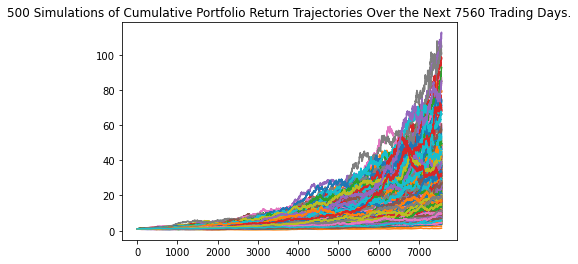

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
# By adding the .plot_simulation() to the Monte Carlo will generate an overlay plot of the data
mc_30yrs_500sims_weight_40_60_line_plot = mc_30yrs_500sims_weight_40_60.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

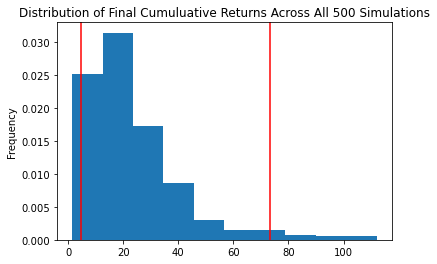

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation  by plotting a histogram
# By adding the .plot_distribution() to the Monte Carlo will generate an histogram of the data
mc_30yrs_500sims_weight_40_60_dist_plot = mc_30yrs_500sims_weight_40_60.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results Save the results as a variable
# Below saves a new variable with the summary statistics of the Monte Carlo by using the Monte Carlo variable and adding the built in function .summarize_cumulative_return()
mc_30yrs_500sims_weight_40_60_sum_stats = mc_30yrs_500sims_weight_40_60.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
mc_30yrs_500sims_weight_40_60_sum_stats

count           500.000000
mean             23.238404
std              17.337738
min               1.426236
25%              11.880719
50%              18.165776
75%              29.725777
max             111.975473
95% CI Lower      4.773710
95% CI Upper     73.313937
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f" The current value of the stocks and bonds is ${total_stocks_bonds:.2f}" )

 The current value of the stocks and bonds is $60689.50


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# Below uses the 95% confidence to generate the upper and lower range of the summary statistics 
ci_lower_thirty_cumulative_return = mc_30yrs_500sims_weight_40_60_sum_stats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_30yrs_500sims_weight_40_60_sum_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f" There is a 95% probability that the current stock and bonds portfolio in 30 years will be valued between ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}")

 There is a 95% probability that the current stock and bonds portfolio in 30 years will be valued between $ 289714.06 and $ 4449386.18


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# Below configures the  10 year cumulative returns forecast simulation with weights 20% bonds and 80% stocks
mc_10yrs_500sims_weight_20_80 = MCSimulation(
portfolio_data = df_potfolio_prices_10yrs_total,
weights = [.20, .80],
num_simulation = 500,
num_trading_days = 252*10)

# Review the simulation input data
mc_10yrs_500sims_weight_20_80

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# Below by using the .calc_cumulative_return() will run the 10 year cumulative returns forecast simulation
mc_10yrs_500sims_weight_20_80.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001286,1.014062,0.990642,1.007080,1.001910,1.007383,0.993827,1.009521,0.995209,0.985927,...,0.987082,0.998080,0.988182,1.006349,0.990093,1.004935,0.996458,1.008056,1.007347,1.003441
2,0.990426,1.022803,0.994559,1.005773,0.983391,1.006287,0.983110,1.003341,1.009174,0.974883,...,0.978642,0.991153,0.989919,0.989625,1.017806,1.001663,1.006625,1.006842,1.011954,1.016325
3,0.991249,1.030308,1.014937,1.012997,0.972924,1.009846,0.983269,1.006723,0.994043,0.974792,...,0.981670,1.018912,0.992563,0.987601,1.027947,1.010482,1.003729,1.017932,1.005538,1.014487
4,0.990871,1.053648,1.037967,1.001227,0.975322,1.000798,0.960200,1.006030,0.983775,0.962906,...,0.973499,1.012512,1.003600,0.995612,1.057290,0.998291,1.023957,1.017575,0.998841,1.003645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.930794,10.420206,1.932987,2.139598,0.823825,3.883034,2.809022,4.630521,3.797511,2.446832,...,4.299108,8.332259,1.591715,4.636015,3.442210,2.649962,3.383958,3.975020,3.170757,8.548310
2517,3.915893,10.301016,1.927921,2.135269,0.827520,3.940028,2.800619,4.583799,3.829645,2.450989,...,4.263194,8.513453,1.596961,4.604359,3.368826,2.684416,3.409694,4.005472,3.131074,8.692774
2518,3.830164,10.311343,1.942514,2.125796,0.822676,3.977621,2.873921,4.465487,3.829458,2.485344,...,4.344090,8.575561,1.589647,4.554389,3.387129,2.706660,3.419055,3.987655,3.127543,8.597827
2519,3.798027,10.490127,1.910182,2.117121,0.834474,3.964038,2.835344,4.466350,3.866260,2.463863,...,4.384112,8.559858,1.574717,4.494516,3.370432,2.721239,3.434398,3.978188,3.081586,8.778721


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

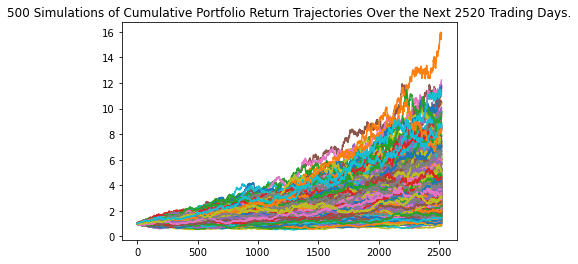

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
# Below the .plot_simulation() is used to generate a line plot
mc_10yrs_500sims_weight_20_80.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

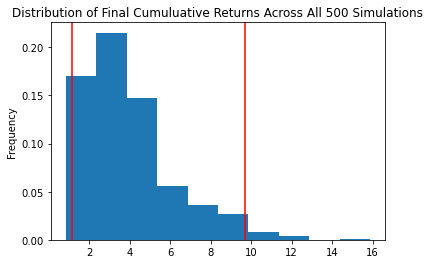

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
# Below the .plot_distribution() is used to generate a histogram 
mc_10yrs_500sims_weight_20_80.plot_distribution()


In [47]:
# Generate summary statistics from the 10-year Monte Carlo simulation results Save the results as a variable
# Below uses the .summarize_cumulative_return() from MCForecastTools import MCSimulation to generate the summary statistics
mc_10yrs_500sims_weight_20_80_sum_stat = mc_10yrs_500sims_weight_20_80.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
mc_10yrs_500sims_weight_20_80_sum_stat

count     10.000000
mean      54.447870
std      156.618780
min        0.832661
25%        2.258351
50%        3.690467
75%        8.508492
max      500.000000
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f" the current value of the stocks and bonds is ${total_stocks_bonds:.2f}" )

 the current value of the stocks and bonds is $60689.50


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# Below assigns the new variables the 95% CI lower and higher by selecting the corresponding values
ci_lower_ten_cumulative_return = mc_10yrs_500sims_weight_20_80_sum_stat[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_10yrs_500sims_weight_20_80_sum_stat[9] * total_stocks_bonds

# Print the result of your calculations
print(f" There is a 95% probability that the current stock and bonds portfolio in 10 years will be valued between ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}" )

 There is a 95% probability that the current stock and bonds portfolio in 10 years will be valued between $ 70131.35 and $ 587472.48


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?